In [1]:
from cleu import plot
from cleu.embeddings import Embeddings
from cleu.plot import plot_embeddings
import importlib
importlib.reload(plot_embeddings)

clwe_en = Embeddings(dim=300,lang='en',cuda=False)
clwe_en.load_embeddings('data/vectors-en.txt',lang='en',max_vocab=10000)

clwe_id = Embeddings(dim=300,lang='id',cuda=False)
clwe_id.load_embeddings('data/vectors-id.txt',lang='id',max_vocab=10000)


clwe_es = Embeddings(dim=300,lang='es',cuda=False)
clwe_es.load_embeddings('data/vectors-es.txt',lang='es',max_vocab=10000)

# plot_embeddings.plot_embeddings_2d([clwe_id,clwe_en,clwe_es],width=900,height=500,dimensionality_reduction='tsne')

Different dimension occured in line $2977


In [2]:
# Return an Embedding object for "you"
emb_you = clwe_en.get_embedding_by_word("you")
# Return nearest neighbour for "you" in English word embeddings
neighbours_you_en = clwe_en.get_nearest_neighbours(emb_you,k=5,distance_function='cosine')
# Return nearest neighbour for "you" in Indonesian word embeddings
neighbours_you_id =  clwe_id.get_nearest_neighbours(emb_you,k=5,distance_function='csls',csls_k=10)

In [11]:
importlib.reload(plot_embeddings)
words_en = ["hypothesis","cat","study","comic"]
emb_en = list(map(lambda word : clwe_en.get_embedding_by_word(word) ,words_en))
plot_embeddings.plot_embeddings_neighbours(emb_en,[clwe_id,clwe_es],width=800,height=500,dimensionality_reduction='umap',k=3,distance_function='csls',csls_k=10)

alt.LayerChart(...)

In [12]:
import altair as alt
alt.data_transformers.disable_max_rows()
plot_embeddings.plot_embeddings_2d([clwe_en,clwe_id,clwe_es],width=800,height=500,dimensionality_reduction='umap')

/mnt/disk-e/Paper SoftwareX/cross-lingual-embeddings-utils/cleu/utils/utils.py:39: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  embeddings_matrix = np.vstack(combine_matrix)


alt.LayerChart(...)

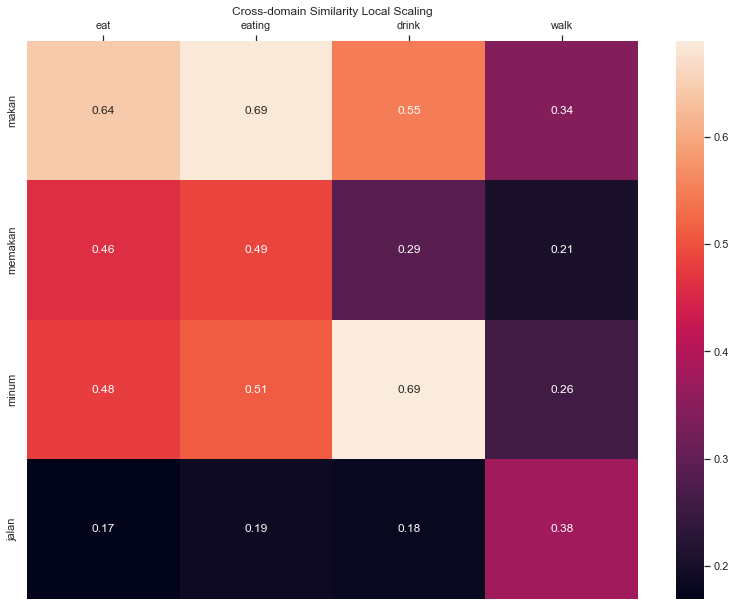

In [19]:
words_id = ["makan","memakan","minum","jalan"]
words_en = ["eat","eating","drink","walk","hypothesis","cat","study","money","bonds"]
emb_id = list(map(lambda word : clwe_id.get_embedding_by_word(word) ,words_id))
emb_en = list(map(lambda word : clwe_en.get_embedding_by_word(word) ,words_en))


# plot_embeddings.plot_confusion_similarity(emb_id,emb_en,distance_function='csls',csls_k=3)
plot_embeddings.plot_confusion_similarity(emb_id,emb_en,distance_function='cosine')